<a href="https://colab.research.google.com/github/MAMANIALEX/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt:  armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares argentinas de nivel secundario
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Filosofía", "Sociología",
    "Arte", "Música", "Informática"
]

# Función para generar un nombre y apellido aleatorio
def generar_nombre_apellido():
    nombres = ["Juan", "María", "Pedro", "Laura", "Carlos", "Ana", "Luis", "Marta", "Diego", "Sofia"]
    apellidos = ["Gómez", "Pérez", "Rodríguez", "Fernández", "López", "García", "Martínez", "Sánchez", "González", "Romero"]
    return f"{random.choice(nombres)} {random.choice(apellidos)}"

# Crear una lista vacía para almacenar los datos
datos = []

# Generar 100 filas de datos
for _ in range(100):
    nombre_apellido = generar_nombre_apellido()
    nro_dni = random.randint(10000000, 99999999)
    materia = random.choice(materias)
    nota_1er_trimestre = random.randint(1, 10)
    nota_2do_trimestre = random.randint(1, 10)
    nota_3er_trimestre = random.randint(1, 10)
    faltas = random.randint(0, 15)

    datos.append([nombre_apellido, nro_dni, materia, nota_1er_trimestre, nota_2do_trimestre, nota_3er_trimestre, faltas])

# Crear el DataFrame a partir de la lista de datos
df = pd.DataFrame(datos, columns=["Nombre y Apellido", "Nro DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a Clases"])

# Imprimir el DataFrame
df

,Nombre y Apellido,Nro DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a Clases
0,Pedro Romero,66644361,Biología,9,8,1,12
1,Marta López,36960631,Educación Física,7,10,2,15
2,Sofia Fernández,33700917,Arte,5,3,10,9
3,Ana García,41095273,Sociología,5,4,9,8
4,Luis García,10993245,Física,2,9,7,15
...,...,...,...,...,...,...,...
95,Ana Romero,19281422,Química,8,4,9,5
96,María Gómez,94219068,Historia,10,3,6,12
97,Marta Martínez,15476534,Matemática,9,6,3,10
98,Laura Pérez,86814185,Sociología,6,6,5,2


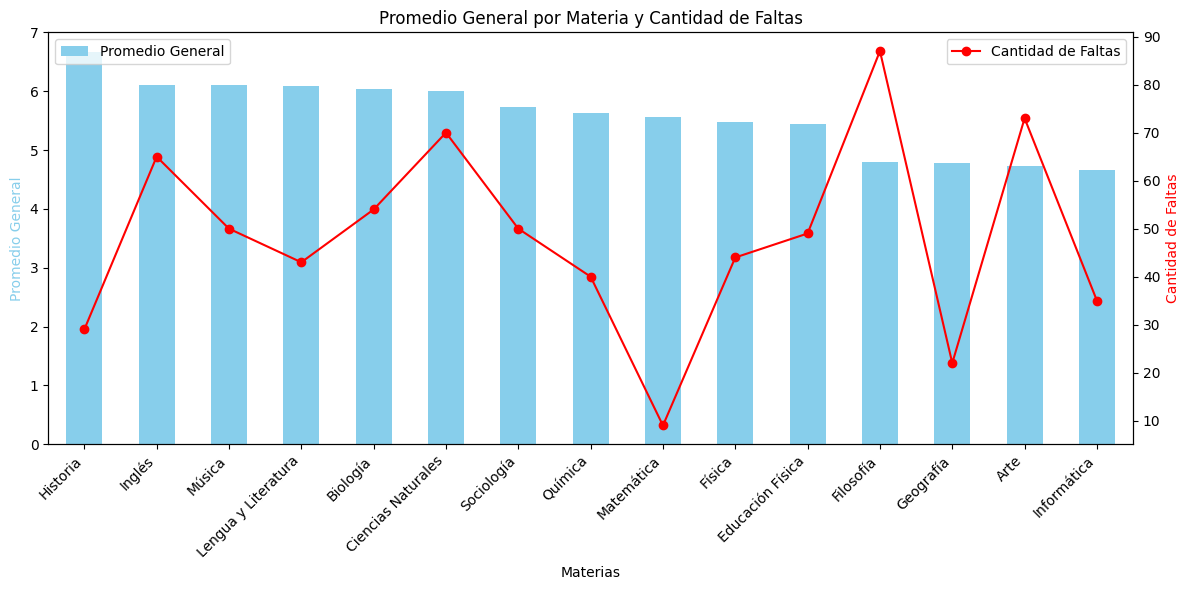

In [3]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt
import pandas as pd

# Calcular el promedio general de cada materia
promedio_por_materia = df.groupby('Materia Escolar').agg({'Nota 1er Trimestre': 'mean', 'Nota 2do Trimestre': 'mean', 'Nota 3er Trimestre': 'mean'})
promedio_general = promedio_por_materia.mean(axis=1)

# Ordenar las materias de mayor a menor promedio general
promedio_general_ordenado = promedio_general.sort_values(ascending=False)

# Calcular la cantidad de faltas por materia
faltas_por_materia = df.groupby('Materia Escolar')['Faltas a Clases'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Gráfico de barras del promedio general
promedio_general_ordenado.plot(kind='bar', ax=ax1, color='skyblue', label='Promedio General')

# Gráfico de línea de la cantidad de faltas
faltas_por_materia.plot(kind='line', ax=ax2, color='red', marker='o', label='Cantidad de Faltas')


# Ajustar la posición de las etiquetas del eje x
ax1.set_xticklabels(promedio_general_ordenado.index, rotation=45, ha='right')

# Agregar leyendas
ax1.set_xlabel('Materias')
ax1.set_ylabel('Promedio General', color='skyblue')
ax2.set_ylabel('Cantidad de Faltas', color='red')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Agregar título
plt.title('Promedio General por Materia y Cantidad de Faltas')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [4]:
df.to_csv("datos_alumnos.csv", index=False)